## Álvaro Sánchez de la Cruz, Marc Gil Arnau
# Tarea 1
# Análisis Exploratorio y Redes Neuronales Artificiales

# Índice de Contenidos

1. [Sección I. Análisis descriptivo y exploratorio de la base de datos](#sección-i-análisis-descriptivo-y-exploratorio)
    * 1. Cargar y leer la base de datos
    * 2. Descripción del conjunto "E-Commerce Shipping"
    * 3. Análisis descriptivo
    * 4. Visualización de variables
    * 5. Análisis de Correlación
    * 6. Preprocesamiento: Codificación y Normalización

2. [Sección II. Esquema lineal y selección de características](#sección-ii-esquema-lineal-y-selección-de-características)
    * 1. Regresión Logística sin regularización (Baseline)
    * 2. Regresión Logística con regularización (L2 - Ridge)
    * 3. Selección de características (Wrapper - RFE)

3. [Sección III. Perceptrón Multicapa (MLP)](#sección-iii-perceptrón-multicapa-mlp)
    * 1. Justificación teórica y diseño
    * 2. MLP de una capa oculta (SLP): Entrenamiento y Resultados
    * 3. MLP Multicapa: Arquitectura y Resultados
    * 4. Selección de características con Wrapper MLP

4. [Sección IV. Comparación de Resultados](#sección-iv-comparación-de-resultados)
    * 1. Tabla comparativa de métricas en Test
    * 2. Conclusión

## Sección I. Análisis descriptivo y exploratorio de la base de datos. Preprocesamiento

## 1.- Cargar y leer la base datos

In [73]:
# Módulos estándar de Python
import itertools
import warnings
warnings.filterwarnings("ignore")

# Módulos de manipulación de datos y visualización
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt

# Módulos estadísticos
import scipy
from scipy import stats as ss

# Módulos de preprocesamiento y codificación
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# Módulos de modelado, selección y evaluación
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier

# Módulos de métricas y evaluación
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    roc_auc_score
)

In [74]:
# Leemos y guardamos el fichero en un dataframe.
comercio_df = pd.read_csv("G04.csv")

comercio_df = comercio_df.drop("ID", axis='columns')

## 2.- Descripción del conjunto "E-Commerce Shipping"

Contexto: Una compañía internacional basada en vender productos electrónicos a través de internet quiere estudiar el comportamiento de sus clientes en base a ciertos datos de ventas. El objetivo es ver si el envío ha llegado a tiempo o no, se trata de una tarea de clasificación.

Variables:

Warehouse Block: La compañía tiene 5 grandes almacenes (A, B, C, D, E). Categórica nominal.

Mode of shipment: La compañía tiene 3 formas de entregar los productos (Ship, Flight, Road). Categórica nominal.

Customer care calls: Número de llamadas que hace el cliente a la compañía para preguntar sobre el estado del envío. Numérica discreta. Rango: [ 2 , 7 ].

Customer rating: Calificación del cliente sobre la compañía. 1 es lo peor, 5 es lo mejor. Numérica discreta ordinal.

Cost of the products: Precio del producto en dólares americanos. Numérica continua. Rango: [ 96 , 310 ].

Prior purchases: Número de compras realizadas por el cliente previamente. Numérica discreta. Rango: [ 2 , 10 ].

Product importance: La compañía ha caracterizado la importancia de cada producto (low, medium, high). Categórica ordinal.

Gender: Género del cliente (Male, Female). Categórica nominal.

Discount offered: Descuento ofrecido en el producto en porcentaje. Numérica continua. Rango: [ 1 , 65 ]

Weight in gms: Peso del producto en gramos. Numérica continua. Rango: [ 1001 , 7846 ].

Reached on time: Es la variable objetivo, 1 indica que el producto NO ha llegado a tiempo y 0 que sí lo ha hecho. Categórica nominal.


In [75]:
# Tipo de las variables
comercio_df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [76]:
# Nombres de las variables
comercio_df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 3.- Análisis descriptivo

In [77]:
# Vistazo rápido a los estadísticos de las variables
comercio_df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [78]:
# Tamaño de la base de datos (número de observaciones, número de muestras)
comercio_df.shape

(10999, 11)

In [79]:
# Número de valores únicos por variable
comercio_df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

Viendo los resultados de .describe() y estos, podemos ver que no hay clientes que hayan llamado 0 ó 1 veces para informarse sobre su pedido así como también que los clientes estudiados tienen como mínimo 2 compras previas. Lo mismo a la compañía sólo le interesa el estudio de sus clientes "fieles".

In [80]:
# ¿Existen valores faltantes?
comercio_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

A priori no hay valores faltantes aunque puede que estemos ante el caso de que los valores faltantes hayan sido sustituidos por 0.

In [81]:
# ¿Está balanceada la variable objetivo?
comercio_df["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Las categorías no están perfectamente equilibradas pero tampoco podemos considerar un grave desbalanceo.

## 4.-Visualización de las variables

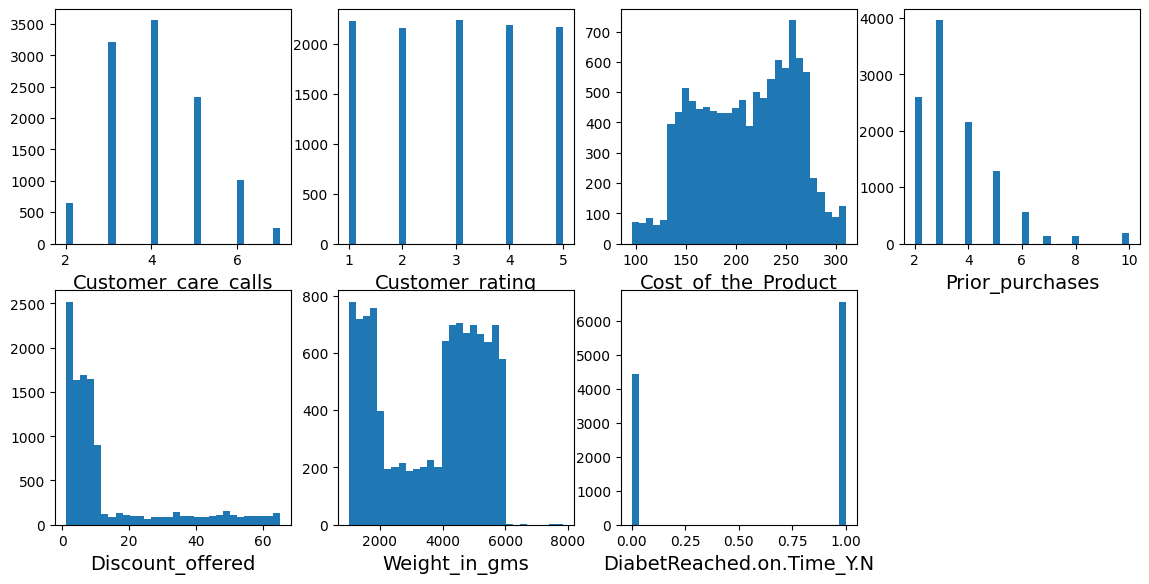

In [82]:
plt.figure(figsize=(14,14))

plt.subplot(4,4,1)
plt.hist(comercio_df["Customer_care_calls"],bins=30)
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(4,4,2)
plt.hist(comercio_df["Customer_rating"],bins=30)
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(4,4,3)
plt.hist(comercio_df["Cost_of_the_Product"],bins=30)
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(4,4,4)
plt.hist(comercio_df["Prior_purchases"],bins=30)
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(4,4,5)
plt.hist(comercio_df["Discount_offered"],bins=30)
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(4,4,6)
plt.hist(comercio_df["Weight_in_gms"],bins=30)
plt.xlabel('Weight_in_gms',fontsize=14)

plt.subplot(4,4,7)
plt.hist(comercio_df["Reached.on.Time_Y.N"],bins=30)
plt.xlabel('Reached.on.Time_Y.N',fontsize=14)



plt.show()

Destacamos el gráfico del peso, vamos a considerar que productos superiores a 6 Kg son productos fuera del peso habitual pero no son atípicos

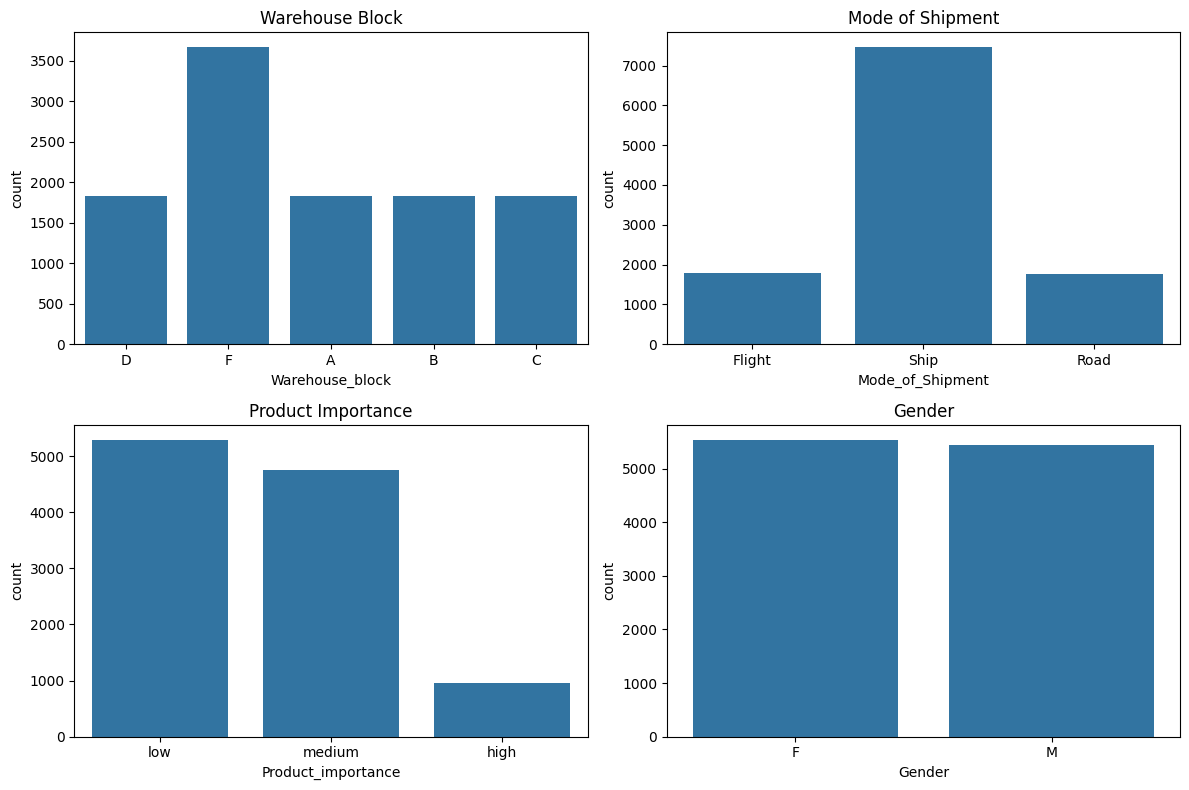

In [83]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas

sns.countplot(x="Warehouse_block", data=comercio_df, ax=axs[0, 0])
axs[0, 0].set_title("Warehouse Block")

sns.countplot(x="Mode_of_Shipment", data=comercio_df, ax=axs[0, 1])
axs[0, 1].set_title("Mode of Shipment")

sns.countplot(x="Product_importance", data=comercio_df, ax=axs[1, 0])
axs[1, 0].set_title("Product Importance")

sns.countplot(x="Gender", data=comercio_df, ax=axs[1, 1])
axs[1, 1].set_title("Gender")

plt.tight_layout()
plt.show()

Resalta el gráfico de los almacenes ya que todos aparentemente tienen la misma frecuencia excepto el almacén "F", que todos tengan la misma frecuencia podría deberse a que quien haya hecho la recogida de muestras ha querido coger el mismo número de clientes por almacén, es decir si cada almacén representase un continente, han escogido el mismo número de clientes por continente. Por otro lado, suponemos que "F" tiene el doble de clientes porque han juntado dos almacenes en uno.

Aparte, nos resulta curioso estudiar qué pasa con la importancia del producto si separamos las muestras entre mujeres y hombres. Ya que si encontrásemos una gran diferencia estudiando las muestras divididas en comparación a juntándolas, crearíamos 2 modelos de clasificación diferenciados por género. 

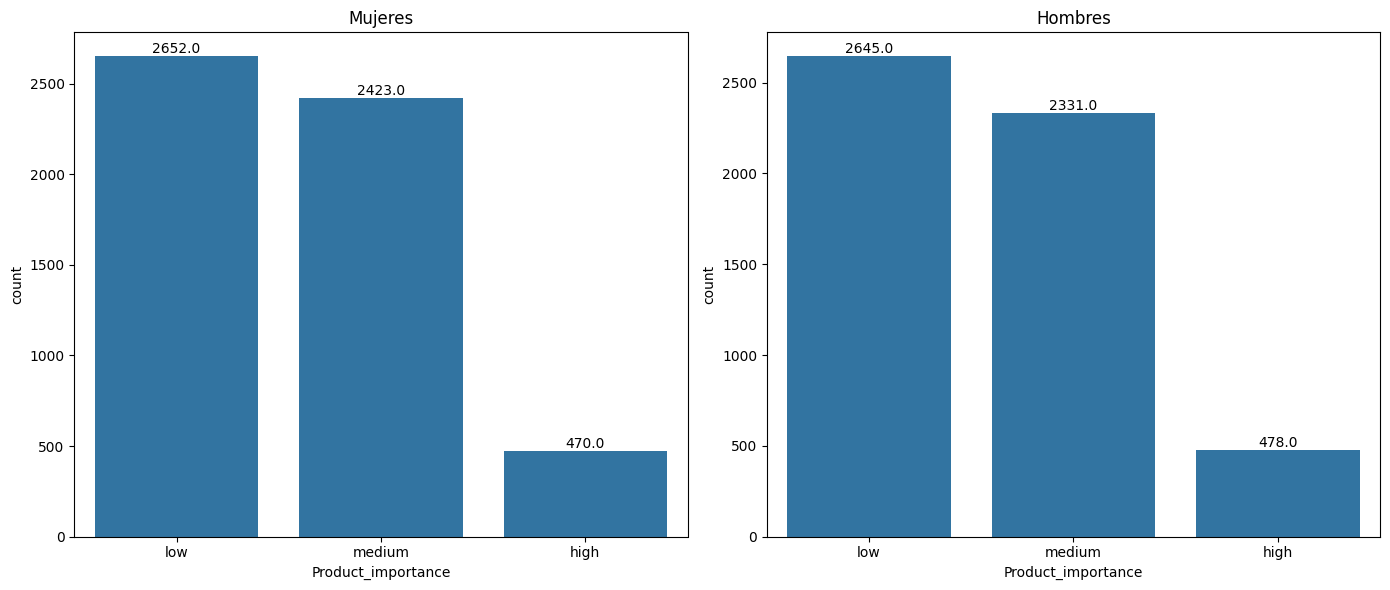

In [84]:
# Crear figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Filtrar por género
mujeres = comercio_df[comercio_df['Gender'] == 'F']
hombres = comercio_df[comercio_df['Gender'] == 'M']

# Countplot para mujeres
sns.countplot(x="Product_importance", data=mujeres, ax=axs[0])
axs[0].set_title("Mujeres")

# Añadir valores encima de cada barra
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Countplot para hombres
sns.countplot(x="Product_importance", data=hombres, ax=axs[1])
axs[1].set_title("Hombres")

# Añadir valores encima de cada barra
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Ajustar espacios
plt.tight_layout()
plt.show()


Comparando los resultados, son casi iguales, no dividiremos el conjunto en 2, y crearemos un solo modelo.

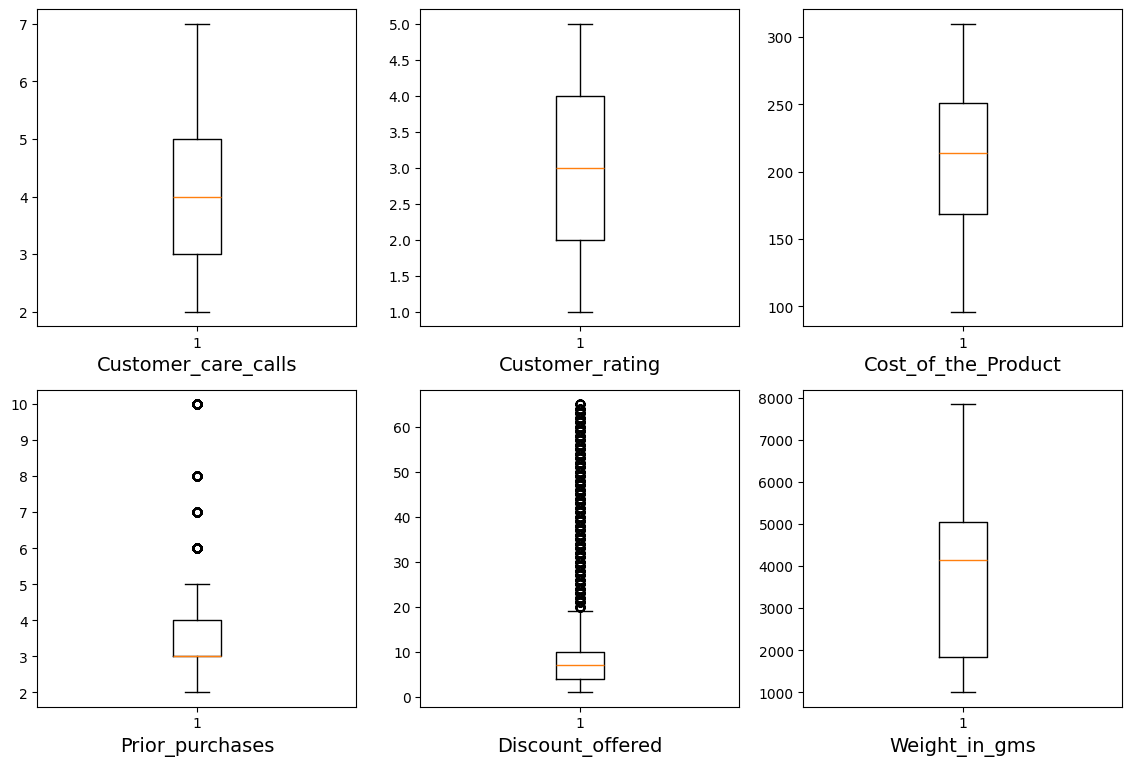

In [85]:
numericas = comercio_df.drop("Reached.on.Time_Y.N", axis='columns')
# Crear un boxplot por cada variable
plt.figure(figsize=(14,14))

plt.subplot(3,3,1)
plt.boxplot(numericas["Customer_care_calls"])
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(3,3,2)
plt.boxplot(numericas["Customer_rating"])
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(3,3,3)
plt.boxplot(numericas["Cost_of_the_Product"])
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(3,3,4)
plt.boxplot(numericas["Prior_purchases"])
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(3,3,5)
plt.boxplot(numericas["Discount_offered"])
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(3,3,6)
plt.boxplot(numericas["Weight_in_gms"])
plt.xlabel('Weight_in_gms',fontsize=14)

plt.show()

Mirando el boxplot de las compras anteriores de los clientes ("Prior purchases") podríamos considerar que los clientes con 6 o más pedidos previos son o bien clientes fieles, o bien compradores compulsivos, este último caso sucedería si las muestras han sido recogidas en un corto espacio de tiempo.

Por otro lado, se observa que los descuentos por encima del 20% son bastante escasos en comparación al resto. Pese a ser valores menos comunes, no los vamos a considerar atípicos.

## 5.- Análisis de correlación

### Correlación entre variables categóricas

Vamos a usar la V de Cramer, que es una medida estadística que cuantifica la fuerza de la asociación entre dos variables nominales o categóricas, con valores que van de 0 (sin asociación) a 1 (asociación perfecta).

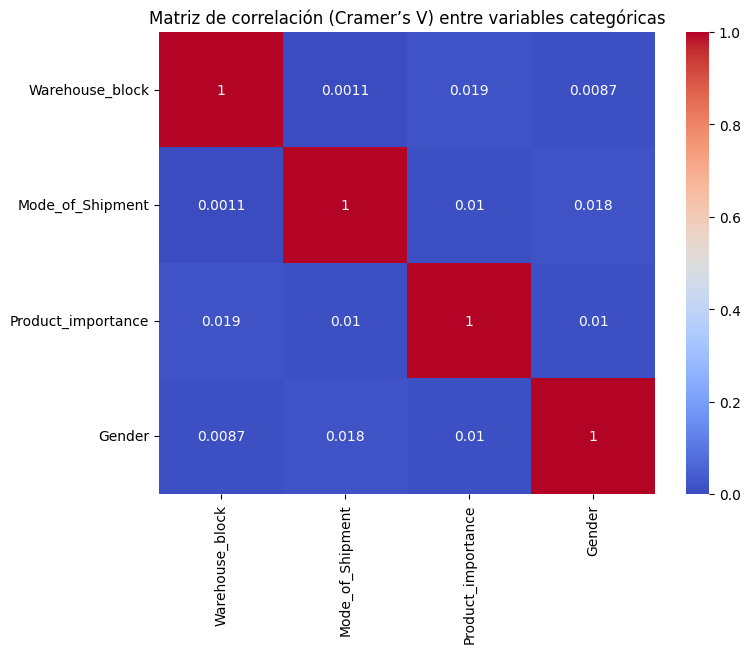

In [86]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Seleccionar variables categóricas
cat_cols = comercio_df.select_dtypes(include='object').columns

# Calcular matriz de Cramer’s V
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(comercio_df[col1], comercio_df[col2])

cramers_results = cramers_results.astype(float)

# Visualizar matriz de correlaciones categóricas
plt.figure(figsize=(8,6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de correlación (Cramer’s V) entre variables categóricas")
plt.show()



Mirando los resultados del gráfico, las variables categóricas están casi incorreladas entre si.

### Correlación entre variables numéricas

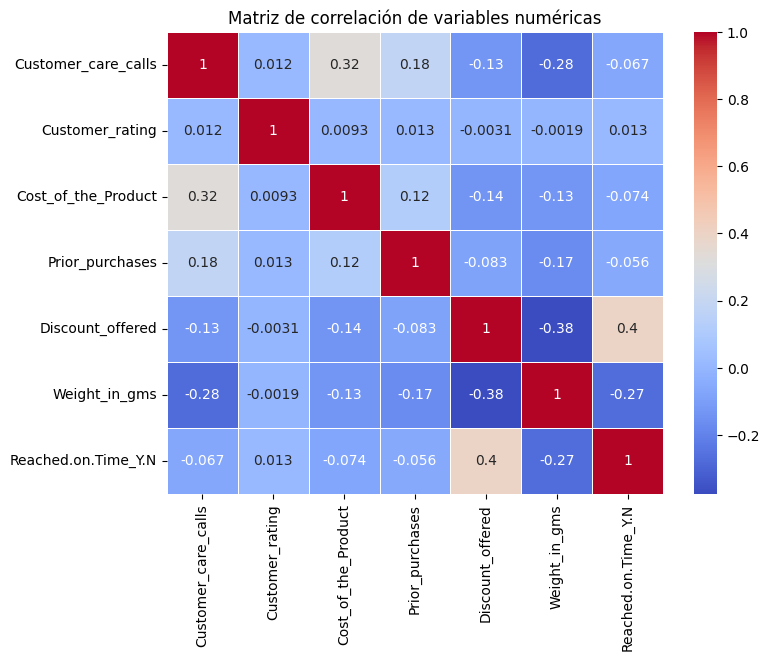

In [87]:
numericas = comercio_df.select_dtypes(include=['int64', 'float64'])
corr = numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

Destacamos: 

  - Cuanto más cuesta el producto, más se preocupa el cliente por él, haciendo más llamadas para saber su estado.
  - La calificación del cliente no aporta nada de información, por lo menos al resto de variables numéricas, veremos si al estudiar luego las relaciones numéricas-categóricas cambia algo.
  - Los productos más pesados tienen menos descuento.
  - En relación con la variable objetivo, a mayor descuento, mayor es la probabilidad de que el pedido llegue a tiempo. Así mismo, los pedidos que pesan más, suelen entregarse tarde.
     

### Correlación entre variables numéricas y categóricas

Para este tipo de relaciones vamos a utilizar eta cuadrado (η²), una medida que cuantifica cuánta proporción de la variabilidad de la variable numérica puede explicarse por las diferencias entre las categorías definidas por la variable categórica.

In [88]:
def eta_squared(data, cat, num):
    groups = [data[num][data[cat] == c] for c in data[cat].unique()]
    
    y = data[num]
    grand_mean = y.mean()
    
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in groups])
    ss_total = sum((y - grand_mean)**2)
    
    return ss_between / ss_total

# Identificar variables numéricas y categóricas
numericas = comercio_df.select_dtypes(include=['number']).columns
categoricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Crear tabla vacía
tabla_eta = pd.DataFrame(index=categoricas, columns=numericas)

# Rellenar tabla con η²
for cat in categoricas:
    for num in numericas:
        tabla_eta.loc[cat, num] = eta_squared(comercio_df, cat, num)

tabla_eta


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,0.000306,0.00017,0.000714,0.000163,0.000197,0.000033,0.000099
Mode_of_Shipment,0.000415,0.000007,0.000067,0.000016,0.000115,0.000017,0.000068
Product_importance,0.003566,0.000023,0.002341,0.000746,0.000769,0.00879,0.00111
Gender,0.000006,0.000008,0.00039,0.000088,0.000139,0.000013,0.000022


Interpretando los resultados, asumimos que las variables numéricas están prácticamente incorreladas con las categóricas

## 6.- Preprocesamiento: Codificación y Normalización

En nuestro dataset hay algunas variables categóricas (gender, warehouse block, mode of shiphment y product importance). Para poder usarlas en los modelos de secciones futuras necesitamos transformarlas a numérico.

Pero antes de aplicar transformaciones sobre los datos vamos a generar una copia para trabajar sobre ella y mantener intactos los datos originales.

In [89]:
comercio_copia = comercio_df.copy()

En el caso de Gender, al ser una variable con solo dos categorías podemos convertirla en una variable binaria sin necesidad de usar el One-Hot Encoding.

In [90]:
# Mapeamos gender en 0 y 1
mapear_gender = {"M": 1, "F": 0}
comercio_copia["Gender"] = comercio_copia["Gender"].map(mapear_gender).astype("Int64")

Para las tres variables restantes aplicaremos One-Hot Encoding para convertirlas a formato numérico. En el caso de Warehouse_block y Mode_of_Shipment lo haremos mediante Target Encoding y en Product_importance lo haremos con Label Encoding.

In [91]:
# Definir el orden de jerarquía y añadir la columna transformada al dataset
orden_importancia = {"low": 0, "medium": 1, "high": 2}
comercio_copia["Product_importance_Encoded"] = comercio_copia["Product_importance"].map(orden_importancia).astype("Int64")

# Eliminar la columna original
comercio_copia = comercio_copia.drop(columns=["Product_importance"])

Antes de hacer el Target Encoding es necesario realizar la partición en diseño y test para que el encoding aprenda solo los datos de entrenamiento y así evitar sobreajuste. Por lo que vamos a dividir de forma estratificada el dataset en proporciones del 70% para diseño y 30% para test.

In [92]:
# Dividimos las variables en variables predictoras y variable objetivo
X = comercio_copia.drop("Reached.on.Time_Y.N", axis = 1)
y = comercio_copia["Reached.on.Time_Y.N"]

In [93]:
# Separamos el conjunto de diseño y de test de forma estratificada: particiones 70/30
X_diseno, X_test, y_diseno, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
print(X_diseno.shape)
print(y_diseno.shape)
print(X_test.shape)
print(y_test.shape)

(7699, 10)
(7699,)
(3300, 10)
(3300,)


Vamos a aplicar el Target Encoding a  Warehouse_block y Mode_of_Shipment

In [94]:
# Aplicamos el Target Encoding
columnas_target_encode = ["Warehouse_block", "Mode_of_Shipment"]
encoder = ce.TargetEncoder(cols=columnas_target_encode, smoothing=0.2)

# Ajustamos solo en el conjunto de diseño
encoder.fit(X_diseno, y_diseno)

# Transformamos diseño y test
X_diseno_encoded = encoder.transform(X_diseno)
X_test_encoded = encoder.transform(X_test)

In [95]:
X_diseno_encoded.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Product_importance_Encoded
5014,0.588976,0.597257,6,2,254,4,1,4,1392,0
8288,0.599216,0.597257,5,4,145,3,1,2,4492,0
7487,0.602308,0.597257,5,1,242,5,1,8,1382,1
9362,0.599216,0.597257,6,1,264,4,1,9,1243,0
1022,0.599216,0.597257,3,4,260,3,0,21,2003,0


Podemos ver como hemos cambiado las variables categóricas a numéricas, Gender, al ser binaria, la mapeamos a 1 y 0, Product_importance (que tiene un orden) la codificamos con Label Encoding para asignar valores (0, 1, 2) que respetan su jerarquía y por último, para Warehouse_block y Mode_of_Shipment usamos Target Encoding para codificarlas. 

En el EDA hemos visto que las variables tenian valores dispares, esto puede afectar a los resultados de los modelos. Para solucionarlo vamos a escalarlas para que tengan media 0 y desviación estándar 1.

In [96]:
# Escogemos las columnas númericas
num_col = X_diseno_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Creamos y ajustamos el scaler solo con el conjunto de diseño
scaler = StandardScaler()
scaler.fit(X_diseno_encoded[num_col])

# Transformamos y asignamos los nuevos valores a ambos conjuntos
X_diseno_encoded[num_col] = scaler.transform(X_diseno_encoded[num_col])
X_test_encoded[num_col] = scaler.transform(X_test_encoded[num_col])
X_test_full = X_test_encoded.copy()

X_diseno_encoded.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Product_importance_Encoded
count,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03
mean,1.032313e-14,1.701463e-14,-2.099603e-17,-6.644899e-17,-1.753515e-17,-1.218231e-16,6.967915e-17,4.983674e-17,8.952156e-17,8.582994e-17
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-1.466621e+00,-2.101834e+00,-1.814828e+00,-1.410971e+00,-2.363375e+00,-1.029378e+00,-1.000650e+00,-7.619641e-01,-1.609112e+00,-9.398831e-01
25%,-1.152692e+00,1.581638e-01,-9.353995e-01,-7.027717e-01,-8.517220e-01,-3.746206e-01,-1.000650e+00,-5.753987e-01,-1.099793e+00,-9.398831e-01
50%,4.774788e-01,1.581638e-01,-5.597091e-02,5.427164e-03,8.011916e-02,-3.746206e-01,9.993508e-01,-3.888333e-01,3.168816e-01,6.196341e-01
75%,1.064547e+00,1.581638e-01,8.234577e-01,7.136260e-01,8.462997e-01,2.801363e-01,9.993508e-01,-2.022680e-01,8.674712e-01,6.196341e-01
max,1.064547e+00,1.348079e+00,2.582315e+00,1.421825e+00,2.068047e+00,4.208678e+00,9.993508e-01,3.218097e+00,2.304018e+00,2.179151e+00


Una vez aplicada la estandarización la tabla confirma que las variables han sido transformadas, ya que la media es prácticamente 0 y la desviación estándar es prácticamente 1.

Antes de comenzar con el diseño y entrenamiento de los modelos en las siguientes secciones, definiremos una función de evaluación. Esto nos permitirá ir registrando las métricas de cada modelo a medida que los generamos, facilitando la creación de la tabla en la Sección IV.

In [97]:
# Diccionario para almacenar los resultados de cada modelo
resultados_comparativa = {}

# Calculamos las métricas y las guardamos en el diccionario
def registrar_metricas(nombre_modelo, y_test_true, y_pred, y_prob):
    metricas = {
        'Accuracy': accuracy_score(y_test_true, y_pred),
        'Precision': precision_score(y_test_true, y_pred, zero_division=0),
        'Recall': recall_score(y_test_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test_true, y_pred, zero_division=0),
        'AUC': roc_auc_score(y_test_true, y_prob)
    }
    resultados_comparativa[nombre_modelo] = metricas

## Sección II. Esquema lineal y selección de características

Antes de aplicar técnicas complejas, entrenaremos una regresión logística estándar, sin penalización en los coeficientes. Esto nos permitirá comparar cuánto ganamos posteriormente al aplicar regularización o selección de características. También analizaremos los coeficientes del modelo para entender qué variables tienen mayor peso en la predicción.

In [98]:
# Creamos el modelo y lo entrenamos con el conjunto de diseño
log_reg_no_reg = LogisticRegression(random_state = 0, max_iter = 1000, penalty=None)
log_reg_no_reg.fit(X_diseno_encoded, y_diseno)

# Evaluamos en test
y_pred_no_reg = log_reg_no_reg.predict(X_test_encoded)

# Guardamos los resultados
y_prob_no_reg = log_reg_no_reg.predict_proba(X_test_encoded)[:, 1]
registrar_metricas("1. RL Baseline", y_test, y_pred_no_reg, y_prob_no_reg)

# Mostramos las métricas
print(classification_report(y_test, y_pred_no_reg))
cm = confusion_matrix(y_test, y_pred_no_reg)
cm_df = pd.DataFrame(cm, index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],    columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])

cm_df

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1331
           1       0.71      0.68      0.70      1969

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.65      3300



,Pred 0 (Llegó a tiempo),Pred 1 (No llegó a tiempo)
Real 0 (Llegó a tiempo),778,553
Real 1 (No llegó a tiempo),621,1348


El modelo base tiene un rendimiento moderado con un accuracy del 64% presentando problemas para distinguir clases. Observamos un desbalance en la capacidad predictiva donde el modelo es mucho mejor detectando retrasos (Clase 1) con una recall del 68% que envíos a tiempo (Clase 0).

Los resultados son los esperados para un modelo sin regularización o selección de características, pero sirve como punto de referencia para comparar con modelos más complejos.

In [99]:
# Mostramos los coeficientes ordenados
coef = log_reg_no_reg.coef_[0]
feature_names = X_diseno_encoded.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coef,
    'AbsCoef': np.abs(coef)
})

coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)
print("Coeficientes ordenados por importancia:\n")

coef_df

Coeficientes ordenados por importancia:



,Feature,Coeficiente,AbsCoef
7,Discount_offered,1.770874,1.770874
8,Weight_in_gms,-0.394105,0.394105
5,Prior_purchases,-0.138669,0.138669
2,Customer_care_calls,-0.128621,0.128621
4,Cost_of_the_Product,-0.104932,0.104932
3,Customer_rating,0.062226,0.062226
9,Product_importance_Encoded,0.061505,0.061505
6,Gender,0.030790,0.030790
1,Mode_of_Shipment,0.012918,0.012918
0,Warehouse_block,0.002784,0.002784


Los coeficientes muestran que la variable Discount_offered es la que mayor impacto tiene en la probabilidad de retraso (Clase 1), favoreciéndola. Por el contrario, el resto de variables tienden a reducir el riesgo de retraso o tienen una influencia casi nula. 
Sin embargo, la ausencia de regularización puede provocar que los coeficientes sean inestables o estén inflados, aumentando el riesgo de sobreajuste y comprometiendo la capacidad de generalización del modelo.

## Regresión logística con regularización

Para optimizar el modelo anterior y controlar su complejidad, aplicaremos técnicas de regularización. Hemos seleccionado la regularización L2 (Ridge) ya que esta penaliza la magnitud de los coeficientes reduciendo la varianza, pero sin forzar su anulación a cero, a diferencia de L1 (Lasso). 

Al trabajar con pocas variables (10 variables predictoras), una regularización de selección de características como L1 podría eliminar información útil. Por eso, preferimos usar L2 para conservar toda la información disponible y hacer la selección de variables en el método Wrapper.

In [100]:
# Configuración de la búsqueda de hiperparámetros para L2
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Definimos el modelo con penalización L2 
log_reg_l2 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 2000, random_state = 0)

# Búsqueda con validación cruzada para optimizar el F1
grid_search_l2 = GridSearchCV(
    estimator=log_reg_l2,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search_l2.fit(X_diseno_encoded, y_diseno)

# Recuperamos el mejor modelo
best_l2_model = grid_search_l2.best_estimator_
best_C = grid_search_l2.best_params_['C']

print(f"Mejor regularización encontrada (C): {best_C}")
print(f"Mejor F1 (Validación Cruzada): {grid_search_l2.best_score_:.4f}")

# Evaluamos en test el modelo regularizado
y_prob_l2 = best_l2_model.predict_proba(X_test_encoded)[:, 1]
y_pred_l2 = best_l2_model.predict(X_test_encoded)

# Guardamos los resultados
registrar_metricas("2. RL Regularizada (L2)", y_test, y_pred_l2, y_prob_l2)

# Mostramos las métricas
print("Reporte de Clasificación (Regularización L2):")
print(classification_report(y_test, y_pred_l2))

Mejor regularización encontrada (C): 0.001
Mejor F1 (Validación Cruzada): 0.7297
Reporte de Clasificación (Regularización L2):
              precision    recall  f1-score   support

           0       0.56      0.36      0.44      1331
           1       0.65      0.81      0.72      1969

    accuracy                           0.63      3300
   macro avg       0.61      0.59      0.58      3300
weighted avg       0.62      0.63      0.61      3300



El modelo con regularización L2 tiene como mejor hiperparámetro C = 0.001, el modelo con este hiperparámetro mantiene el comportamiento del anterior con una elevada capacidad para detectar retrasos (recall de la clase 1 = 0.809), a costa de un menor rendimiento global (accuracy = 0.629) y una pérdida notable de recall en la clase 0, es decir capacidad para detectar envíos a tiempo.

In [101]:
# Mostramos los coeficientes ordenados
coef_l2 = pd.DataFrame({
    'Feature': X_diseno_encoded.columns,
    'Coeficiente': best_l2_model.coef_[0],
    'Abs_Coef': np.abs(best_l2_model.coef_[0])
}).sort_values(by='Abs_Coef', ascending=False)

coef_l2

,Feature,Coeficiente,Abs_Coef
7,Discount_offered,0.523947,0.523947
8,Weight_in_gms,-0.295232,0.295232
2,Customer_care_calls,-0.094190,0.094190
5,Prior_purchases,-0.082220,0.082220
4,Cost_of_the_Product,-0.077290,0.077290
3,Customer_rating,0.033330,0.033330
9,Product_importance_Encoded,0.033080,0.033080
6,Gender,0.014284,0.014284
1,Mode_of_Shipment,0.008534,0.008534
0,Warehouse_block,0.005877,0.005877


Los coeficientes del modelo se reducen respecto a la regresión logística sin regularización. Las variables más influyentes siguen siendo “Discount_offered” y “Weight_in_gms”, influyendo de la misma forma que en el modelo anterior.

En conjunto, L2 mejora la capacidad para identificar retrasos y genera un modelo más robusto, aunque sacrifica precisión en las entregas a tiempo.

### Selección de características

Para identificar qué variables aportan realmente información al modelo, aplicamos selección de características mediante Recursive Feature Elimination (RFE) usando la regresión logística con regularización L2.

RFE elimina iterativamente las características menos importantes según los coeficientes del modelo, permitiendo identificar un subconjunto óptimo de predictores que mantenga o mejore el rendimiento.

Probamos diferentes números de características para encontrar cuántas son realmente necesarias.

In [102]:
resultados_rfe = []
# Probamos subsets desde 4 variables hasta el total usando el mejor C encontrado anteriormente
for k in range(4, X_diseno_encoded.shape[1] + 1):
    # Selección de variables
    estimador_base = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', max_iter=2000, random_state=0)
    selector = RFE(estimator=estimador_base, n_features_to_select=k)
    selector.fit(X_diseno_encoded, y_diseno)
    
    vars_seleccionadas = X_diseno_encoded.columns[selector.support_]
    
    # Validación del subset
    modelo_subset = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', max_iter=2000, random_state=0)
    modelo_subset.fit(X_diseno_encoded[vars_seleccionadas], y_diseno)
    
    y_pred_temp = modelo_subset.predict(X_test_encoded[vars_seleccionadas])
    
    # Guardamos métricas
    f1 = f1_score(y_test, y_pred_temp, zero_division=0)
    acc = accuracy_score(y_test, y_pred_temp)
    resultados_rfe.append([k, acc, f1, list(vars_seleccionadas)])

df_rfe = pd.DataFrame(resultados_rfe, columns=['Num_Vars', 'Accuracy', 'F1_Score', 'Variables'])
display(df_rfe.sort_values(by='F1_Score', ascending=False).head(5))

,Num_Vars,Accuracy,F1_Score,Variables
0,4,0.635455,0.727520,"[Customer_care_calls, Prior_purchases, Discoun..."
4,8,0.630000,0.723192,"[Customer_care_calls, Customer_rating, Cost_of..."
5,9,0.630000,0.722941,"[Mode_of_Shipment, Customer_care_calls, Custom..."
6,10,0.629394,0.722613,"[Warehouse_block, Mode_of_Shipment, Customer_c..."
3,7,0.627879,0.721668,"[Customer_care_calls, Customer_rating, Cost_of..."


In [103]:
# Obtener la mejor configuración
mejor_resultado = df_rfe.loc[df_rfe['F1_Score'].idxmax()]
mejores_vars = mejor_resultado['Variables']
print(f"Número óptimo de variables: {len(mejores_vars)}")
print(f"Variables seleccionadas: {mejores_vars}")

# Entrenar el modelo con esas variables
modelo_final_rfe = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', max_iter=2000, random_state=0)
modelo_final_rfe.fit(X_diseno_encoded[mejores_vars], y_diseno)

# Evaluación del modelo en test
y_pred_rfe = modelo_final_rfe.predict(X_test_encoded[mejores_vars])

# Guardamos los resultados
y_prob_rfe = modelo_final_rfe.predict_proba(X_test_encoded[mejores_vars])[:, 1]
registrar_metricas("3. RL Wrapper RFE", y_test, y_pred_rfe, y_prob_rfe)

# Mostramos las métricas
print("Evaluación Definitiva del Modelo Wrapper (RFE):")
print(classification_report(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
display(pd.DataFrame(cm_rfe, index=['Real 0', 'Real 1'], columns=['Pred 0', 'Pred 1']))

Número óptimo de variables: 4
Variables seleccionadas: ['Customer_care_calls', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
Evaluación Definitiva del Modelo Wrapper (RFE):
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      1331
           1       0.66      0.82      0.73      1969

    accuracy                           0.64      3300
   macro avg       0.62      0.59      0.59      3300
weighted avg       0.62      0.64      0.62      3300



,Pred 0,Pred 1
Real 0,491,840
Real 1,363,1606


El modelo alcanza su rendimiento óptimo utilizando únicamente 4 variables (Customer_care_calls, Prior_purchases, Discount_offered y Weight_in_gms).

Con este subconjunto, obtenemos un F1 de 0.73. Esto demuestra que variables como el género, el bloque de almacén o el coste del producto no aportan información predictiva relevante para el modelo lineal. 

## Sección 3: MLP

Ahora buscaremos la arquitectura óptima del MLP de capa única (SLP) mediante validación cruzada variando el número de neuronas de la capa oculta y la función de activación.

Haremos el entrenamiento con una estrategia de Early Stopping, además reservaremos el 20% de los datos de diseño para validación para evitar sobreajuste. 

In [104]:
# Definición del modelo base
mlp_base = MLPClassifier(
    solver='adam',
    max_iter=1000,            
    early_stopping=True,      
    validation_fraction=0.2,  
    random_state=0
)

# Buscamos el mejor número de neuronas y la mejor función de activación
param_grid_slp = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (30,), (50,)], 
    'activation': ['tanh', 'relu', 'logistic']
}

grid_search_slp = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid_slp,
    scoring='f1',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_slp.fit(X_diseno_encoded, y_diseno)

# Mostramos los resultados
mejor_slp = grid_search_slp.best_estimator_
print(f"\nMejor arquitectura encontrada: {grid_search_slp.best_params_}")
print(f"Mejor F1 (Validación Cruzada): {grid_search_slp.best_score_:.4f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Mejor arquitectura encontrada: {'activation': 'logistic', 'hidden_layer_sizes': (50,)}
Mejor F1 (Validación Cruzada): 0.7125


In [105]:
# Predicciones en test con el modelo óptimo
y_pred_slp = mejor_slp.predict(X_test_encoded)
y_prob_slp = mejor_slp.predict_proba(X_test_encoded)[:, 1]

# Cálculo de métricas
metrics_dict_slp_optimo = {
    'Accuracy': accuracy_score(y_test, y_pred_slp),
    'Precision': precision_score(y_test, y_pred_slp, zero_division=0),
    'Recall': recall_score(y_test, y_pred_slp, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_slp, zero_division=0),
    'AUC': roc_auc_score(y_test, y_prob_slp)
}

# Guardamos los resultados
registrar_metricas("4. MLP Capa Única (SLP)", y_test, y_pred_slp, y_prob_slp)

# Mostramos las métricas
print("Rendimiento en Test: MLP de una Capa Oculta (SLP):")
metrics_df_slp = pd.DataFrame([metrics_dict_slp_optimo], index=[" "]).round(4)
display(metrics_df_slp)

cm_slp = confusion_matrix(y_test, y_pred_slp)
cm_df_slp = pd.DataFrame(cm_slp, 
                         index=['Real 0 (A tiempo)', 'Real 1 (Retraso)'], 
                         columns=['Pred 0', 'Pred 1'])
print("Matriz de Confusión (SLP):")
display(cm_df_slp)

Rendimiento en Test: MLP de una Capa Oculta (SLP):


,Accuracy,Precision,Recall,F1-Score,AUC
,0.6479,0.7051,0.7044,0.7048,0.7293


Matriz de Confusión (SLP):


,Pred 0,Pred 1
Real 0 (A tiempo),751,580
Real 1 (Retraso),582,1387


La validación cruzada ha seleccionado como arquitectura óptima la compuesta por 50 neuronas en la capa oculta y función de activación logística.

En cuanto al rendimiento, el modelo alcanza un F1 de 0.70 y un AUC de 0.729. Al comparar estos resultados con la Regresión Logística, destacamos una mejora. Además el MLP logra una mayor precisión (70.5%), reduciendo significativamente las falsas alarmas respecto al modelo lineal (que tenía baja precisión). Aunque el Recall baja al 70%, el SLP ofrece predicciones más equilibradas y robustas.

Aunque el accuracy se mantiene en 64%, por lo que debe de haber ruido en los datos que la complejidad del modelo no puede superar.

### Más de una capa oculta

Vamos a usar dos capas ocultas porque nos parece que nuestro problema no requiere una arquitectura muy compleja.

Como figura de mérito para ver cuando dejamos de entrenar, hemos optado por la AUC ya que nuestro problemas es binario y AUC es una métrica robusta.

Dejaremos de entrenar si la AUC no mejora en 8 épocas (como máximo se harán 80 épocas).

Probaremos 3 arquitecturas diferentes para cada función de activación (ReLu, tanh y sigmoide).


Entrenando arquitectura (16, 8) con activación relu

Entrenando arquitectura (32, 16) con activación relu

Entrenando arquitectura (64, 32) con activación relu

Entrenando arquitectura (16, 8) con activación tanh

Entrenando arquitectura (32, 16) con activación tanh
 -> Early stopping tras 70 épocas

Entrenando arquitectura (64, 32) con activación tanh
 -> Early stopping tras 64 épocas

Entrenando arquitectura (16, 8) con activación logistic

Entrenando arquitectura (32, 16) con activación logistic

Entrenando arquitectura (64, 32) con activación logistic


,Activation,Architecture,AUC_test
0,relu,"(16, 8)",0.706529
1,relu,"(32, 16)",0.719454
2,relu,"(64, 32)",0.726485
3,tanh,"(16, 8)",0.726884
4,tanh,"(32, 16)",0.732610
5,tanh,"(64, 32)",0.726874
6,logistic,"(16, 8)",0.582623
7,logistic,"(32, 16)",0.575799
8,logistic,"(64, 32)",0.478197



MEJOR ACTIVACIÓN: tanh
MEJOR ARQUITECTURA: (32, 16)

MÉTRICAS EN TEST: {'accuracy': 0.6587878787878788, 'precision_pos': 0.7164869029275809, 'recall_pos': 0.7084814626714068, 'f1_pos': 0.7124616956077631, 'auc': 0.732610153090407}


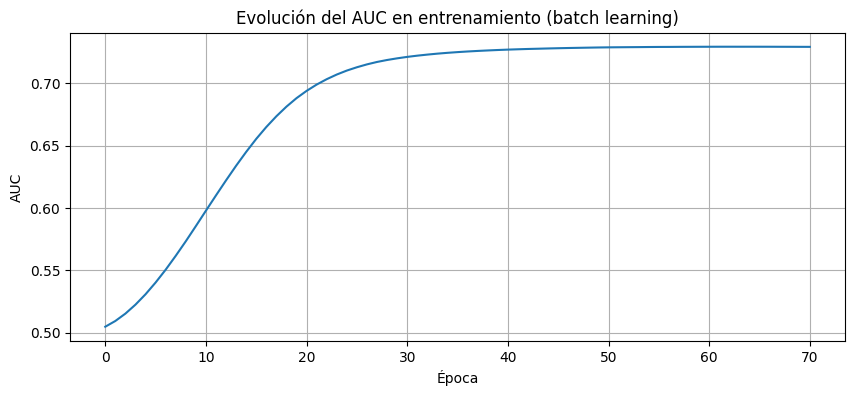

In [106]:
X_train = X_diseno_encoded.values
X_test = X_test_encoded.values

y_train = y_diseno.values
y_test = y_test.values


# Función para evaluar el MLP en cada arquitectura
def compute_metrics(y_true, y_pred_prob):
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_pos": precision_score(y_true, y_pred),
        "recall_pos": recall_score(y_true, y_pred),
        "f1_pos": f1_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_pred_prob)
    }


# Entrenamiento batch puro
activations = ["relu", "tanh", "logistic"]
architectures = [(16, 8), (32, 16), (64, 32)]

resultados = []

n_epochs = 80
patience = 8

for act in activations:
    for arch in architectures:

        print(f"\nEntrenando arquitectura {arch} con activación {act}")

        model = MLPClassifier(
            hidden_layer_sizes=arch,
            activation=act,
            solver="sgd",           
            learning_rate_init=0.01,
            batch_size=X_train.shape[0],   
            max_iter=1,
            warm_start=True,
            random_state=0
        )

        auc_history = []
        best_auc = -np.inf
        no_improve = 0

        for epoch in range(n_epochs):

            if epoch == 0:
                model.partial_fit(X_train, y_train, classes=[0, 1])
            else:
                model.partial_fit(X_train, y_train)

            # Monitorizamos AUC en train
            y_prob = model.predict_proba(X_train)[:, 1]
            auc = roc_auc_score(y_train, y_prob)
            auc_history.append(auc)

            # Early stopping (si no mejora)
            if auc > best_auc:
                best_auc = auc
                no_improve = 0
            else:
                no_improve += 1

            if no_improve >= patience:
                print(f" -> Early stopping tras {epoch} épocas")
                break

        # Métricas en test
        y_prob_test = model.predict_proba(X_test)[:, 1]
        metrics = compute_metrics(y_test, y_prob_test)

        resultados.append([act, arch, metrics, auc_history])



# Elegimos el mejor modelo
df_res = pd.DataFrame(
    [[r[0], r[1], r[2]["auc"]] for r in resultados],
    columns=["Activation", "Architecture", "AUC_test"]
)

display(df_res)

best_index = np.argmax(df_res["AUC_test"])
best = resultados[best_index]

best_activation = best[0]
best_architecture = best[1]
best_auc_curve = best[3]
best_metrics = best[2]

print("\nMEJOR ACTIVACIÓN:", best_activation)
print("MEJOR ARQUITECTURA:", best_architecture)
print("\nMÉTRICAS EN TEST:", best_metrics)

# Entrenamos nuevamente el mejor modelo como modelo final
mejor_modelo = MLPClassifier(
    hidden_layer_sizes=best_architecture,
    activation=best_activation,
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=X_train.shape[0],
    max_iter=n_epochs,
    random_state=0
)

mejor_modelo.fit(X_train, y_train)

# Predicciones del mejor modelo
y_prob_multi = mejor_modelo.predict_proba(X_test)[:, 1]
y_pred_multi = (y_prob_multi >= 0.5).astype(int)

# Guardamos resultados
registrar_metricas("5. MLP Multicapa", y_test, y_pred_multi, y_prob_multi)

# Gráfica de la evolución del AUC por épocas
plt.figure(figsize=(10,4))
plt.plot(best_auc_curve)
plt.title("Evolución del AUC en entrenamiento (batch learning)")
plt.xlabel("Época")
plt.ylabel("AUC")
plt.grid(True)
plt.show()

### Wrapper con MLP

In [107]:
# Elegimos las variables más importantes para el wrapper
top_features = X_diseno_encoded.columns[:10]   
all_features = top_features.tolist()


# Función para evaluar un subset con un MLP
def evaluar_subset(features_subset):
    X_train = X_diseno_encoded[list(features_subset)].values
    X_test_ = X_test_full[list(features_subset)].values
    y_train = y_diseno.values
    y_test_ = y_test   

    model = MLPClassifier(
        hidden_layer_sizes=(10, 5),
        activation="relu",
        solver="adam",
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=0
    )

    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test_)[:, 1]
    auc = roc_auc_score(y_test_, y_prob)
    return auc


# Probamos todas las combinaciones 
resultados = []

for k in range(2, 4):  
    for subset in itertools.combinations(all_features, k):
        auc = evaluar_subset(subset)
        resultados.append([subset, auc])
        print(f"Subset: {subset} -> AUC = {auc:.4f}")

df_results = pd.DataFrame(resultados, columns=["Subset", "AUC"])
df_results = df_results.sort_values("AUC", ascending=False)
print("\nRanking de subsets por AUC:")
display(df_results.head())


# Mejor subset
best_subset = df_results.iloc[0]["Subset"]
print("\nMejor subset seleccionado por el wrapper MLP:", best_subset)


# Entrenamos el modelo lineal con el mejor subset
X_train_best = X_diseno_encoded[list(best_subset)]
X_test_best  = X_test_full[list(best_subset)]

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_best, y_diseno)

# Predicciones finales del modelo lineal
y_prob_wrapper_mlp = log_model.predict_proba(X_test_best)[:, 1]
y_pred_wrapper_mlp = (y_prob_wrapper_mlp >= 0.5).astype(int)
auc_final = roc_auc_score(y_test, y_prob_wrapper_mlp)

print("\nAUC del modelo lineal usando el subset elegido:", auc_final)

# Guardamos los resultados en el diccionario general
registrar_metricas("6. RL Wrapper MLP", y_test, y_pred_wrapper_mlp, y_prob_wrapper_mlp)


Subset: ('Warehouse_block', 'Mode_of_Shipment') -> AUC = 0.4849
Subset: ('Warehouse_block', 'Customer_care_calls') -> AUC = 0.4956
Subset: ('Warehouse_block', 'Customer_rating') -> AUC = 0.4807
Subset: ('Warehouse_block', 'Cost_of_the_Product') -> AUC = 0.4885
Subset: ('Warehouse_block', 'Prior_purchases') -> AUC = 0.4950
Subset: ('Warehouse_block', 'Gender') -> AUC = 0.4820
Subset: ('Warehouse_block', 'Discount_offered') -> AUC = 0.7077
Subset: ('Warehouse_block', 'Weight_in_gms') -> AUC = 0.7140
Subset: ('Warehouse_block', 'Product_importance_Encoded') -> AUC = 0.4898
Subset: ('Mode_of_Shipment', 'Customer_care_calls') -> AUC = 0.5207
Subset: ('Mode_of_Shipment', 'Customer_rating') -> AUC = 0.5041
Subset: ('Mode_of_Shipment', 'Cost_of_the_Product') -> AUC = 0.5360
Subset: ('Mode_of_Shipment', 'Prior_purchases') -> AUC = 0.5307
Subset: ('Mode_of_Shipment', 'Gender') -> AUC = 0.5027
Subset: ('Mode_of_Shipment', 'Discount_offered') -> AUC = 0.7112
Subset: ('Mode_of_Shipment', 'Weight_in

,Subset,AUC
152,"(Cost_of_the_Product, Discount_offered, Weight...",0.751476
97,"(Mode_of_Shipment, Cost_of_the_Product, Weight...",0.749304
133,"(Customer_rating, Cost_of_the_Product, Weight_...",0.748399
127,"(Customer_care_calls, Discount_offered, Weight...",0.747485
69,"(Warehouse_block, Cost_of_the_Product, Weight_...",0.747366



Mejor subset seleccionado por el wrapper MLP: ('Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms')

AUC del modelo lineal usando el subset elegido: 0.725404170350424


Como ya habíamos observado en el otro apartado donde aplicábamos un wrapper, la mayoría de las variables no aportan apenas información. 

## Sección IV. Comparación de Resultados



A continuación, vamos a comparar todos los modelos generados en las secciones anteriores con el objetivo de contrastar las aproximaciones lineales (Regresiones Logísticas) frente a las no lineales (Perceptrón Multicapa), analizando las distintas figuras de mérito.

In [108]:
# Mostramos el diccionario donde hemos ido guardando los resultados
df_comparacion = pd.DataFrame(resultados_comparativa).T
columnas_ordenadas = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'AUC'] 
df_comparacion = df_comparacion[columnas_ordenadas].round(4)

display(df_comparacion.sort_values(by="AUC", ascending=False))

,Accuracy,F1-Score,Precision,Recall,AUC
3. RL Wrapper RFE,0.6355,0.7275,0.6566,0.8156,0.7340
5. MLP Multicapa,0.6564,0.7103,0.7147,0.7059,0.7319
2. RL Regularizada (L2),0.6294,0.7226,0.6529,0.8090,0.7306
4. MLP Capa Única (SLP),0.6479,0.7048,0.7051,0.7044,0.7293
6. RL Wrapper MLP,0.6364,0.6928,0.6985,0.6872,0.7254
1. RL Baseline,0.6442,0.6966,0.7091,0.6846,0.7250


Los modelos lineales, sobre todo la Regresión Logística con selección de variables (RFE), intentan cazar todos los retrasos posibles. Por eso este modelo tiene el mejor recall (81%). Lo más sorprendente es que consigue este rendimiento usando solo 4 variables, lo que demuestra que muchas de las variables originales eran puro ruido. Eso sí, al ser tan sensible, comete más errores de falsa alarma (menor precisión).

Por otro lado, los modelos neuronales (MLP) sacrifican un poco de capacidad para detectar retrasos (el recall baja) a cambio de ser más fiables cuando dan una alerta, con una precisión superior al 70%. Los modelos MLP son los más equilibrados en cuanto a capacidad predictiva.

### Conclusión

La elección del modelo depende de lo que busque la empresa, si la prioridad es que no se escape ningún retraso (aunque revisemos algunos paquetes de más), la mejor opción es la Regresión Logística con RFE por su alta sensibilidad y simplicidad. Si preferimos un sistema más equilibrado y con menos falsas alertas, el MLP Multicapa es superior.